## Inferential Stats
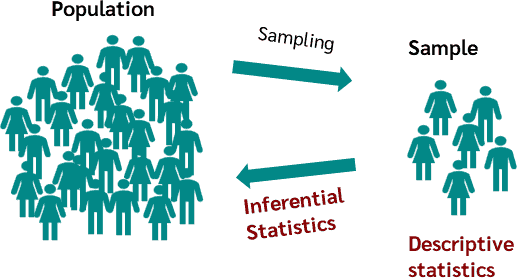

Inferential statistics serves two primary purposes:

Making Inferences about a Population:

- One of the main uses of inferential statistics is to draw conclusions or make inferences about a population based on a sample of data from that population.
- Instead of studying an entire population, which may be impractical or impossible, researchers use inferential statistics to analyze a subset (sample) and then generalize the findings to the larger population.
- This involves estimating parameters, such as population mean or proportion, and making predictions or drawing conclusions about the population based on the sample data.

Testing Hypotheses and Making Statistical Decisions:

- Inferential statistics is also crucial for hypothesis testing, where researchers formulate hypotheses about a population parameter and use sample data to assess the validity of these hypotheses.
- Through hypothesis testing, researchers can make decisions about whether observed differences or effects are likely to be real or if they could have occurred by chance.
- This involves comparing sample statistics to expected values under a null hypothesis and assessing the statistical significance of results.

In summary, inferential statistics allows researchers to make broader inferences about populations based on samples and to test hypotheses and make decisions about the likely validity of observed effects or differences. It plays a vital role in scientific research, decision-making, and drawing meaningful conclusions from data.

In [1]:
# Liblary

# Basic Operation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from statsmodels.stats.weightstats import ztest

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv('data/train.csv.xls')

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Basic Probability

In [5]:
# Lets check the different neighborhoods
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [6]:
# total number of house in neighborhood
all_houses = len(df)
print("Total Number of House in the Neighborhood :", all_houses)

Total Number of House in the Neighborhood : 1460


In [7]:
# total number of house in the old town neighborhood
houses_in_OldTown = len(df[df['Neighborhood'] == 'OldTown'])
print("Total Number of House in the Old town Road :",houses_in_OldTown)

Total Number of House in the Old town Road : 113


In [8]:
# Lets find the probability of picking a house in old town
probability = (houses_in_OldTown/all_houses)*100
print('Probability of picking a house in OldTown: {0:.2f}'.format(probability)+'%')

Probability of picking a house in OldTown: 7.74%


## Conditional Probability

In [9]:
# Enter conditional probability code
cond_prob = (houses_in_OldTown/all_houses)*((houses_in_OldTown - 1)/(all_houses - 1))
print(" The Probability of Picking House in Old Town House and again picking a house from the same neighborhood is {0:.9f}".
     format(cond_prob*100))

 The Probability of Picking House in Old Town House and again picking a house from the same neighborhood is 0.594139352


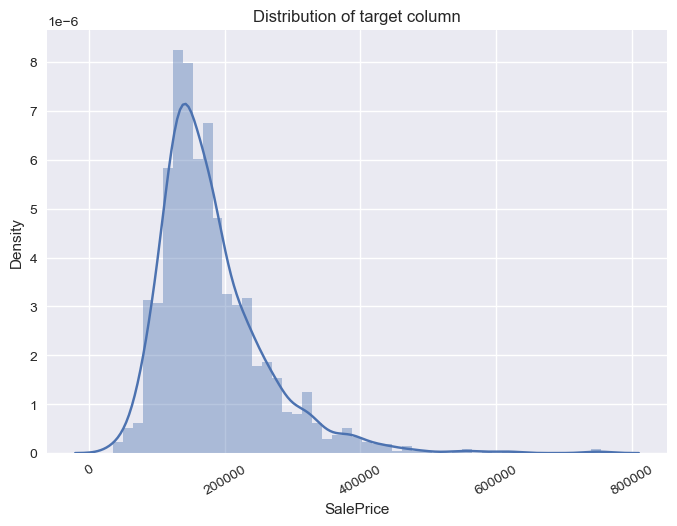

In [10]:
plt.rcParams['figure.figsize'] = (6,4)
plt.style.use('seaborn')

plt.xticks(rotation=30)
sns.distplot(df['SalePrice'])
plt.title('Distribution of target column')
plt.show()

In [11]:
# Computing the skewness for each feature
df['SalePrice'].skew()

1.8828757597682129

### Sample Mean and Population Mean

In [12]:
# Lets take seed so that everytime the random values came out to be constrant
np.random.seed(100)

# lets take 500 sample values from the dataset of 1460 values
sample_ages = np.random.choice(a = df['SalePrice'], size=500)

#getting the sample mean
print("Sample Mean:", sample_ages.mean())
print("Sample Median:", np.median(sample_ages))
print("Sample std:", np.std(sample_ages))

#getting the population mean
print("Population mean:", df['SalePrice'].mean())
print("Population Median:", df['SalePrice'].median())
print("Population std:", df['SalePrice'].std())

Sample Mean: 180098.748
Sample Median: 160750.0
Sample std: 76917.46070886959
Population mean: 180921.19589041095
Population Median: 163000.0
Population std: 79442.50288288663


> from above information, we can infer that the sample mean, median and std are not far from the population, hence.....

## Central Limit Theorem
The Central Limit Theorem (CLT) is a statistical concept that states that the distribution of the sum or average of a large number of independent, identically distributed random variables approaches a normal (Gaussian) distribution, regardless of the original distribution of the variables. In simpler terms, when you add up or average out a bunch of random things, you end up with a nice, predictable bell curve. This is super handy for making statistical inferences, especially when dealing with large samples.

## Confidence Interval
A Confidence Interval (CI) is a statistical concept used to estimate the range within which a population parameter, such as a mean or proportion, is likely to lie. It provides a range of values, along with a level of confidence, indicating the degree of certainty associated with the estimate. For example, a 95% confidence interval implies that if we were to take many samples and construct intervals in the same way, we would expect about 95% of those intervals to contain the true population parameter. In essence, it helps quantify the uncertainty in our sample-based estimates of population parameters.

In [13]:
import scipy.stats as stats
import math

In [14]:
# Lets seed the random values
np.random.seed(10)

# Lets take a sample size
sample_size = 1000
sample = np.random.choice(a=df['SalePrice'], size = sample_size)
sample_mean = sample.mean()

In [15]:
# get the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

# Check the z-critical value
print("z-critcial value: ",z_critical)

z-critcial value:  1.6448536269514722


In [16]:
# Get the population standard deviation
pop_stdev = df['SalePrice'].std()

# Checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

In [17]:
# Lets print the result
print("Confidance interval: ", end=" ")
print(confidence_interval)
print("True Mean: {}".format(df['SalePrice'].mean()))

Confidance interval:  (178338.05201966673, 186602.42998033328)
True Mean: 180921.19589041095


### P Value

In [18]:
# getting z-stats, p-value

old_town_sale_price = df[df['Neighborhood'] == 'OldTown']['SalePrice']
mean_values = df['SalePrice'].mean()
z_statistic, p_value = ztest(x1 = old_town_sale_price,
                            value = mean_values)

In [19]:
# lets print the result
print('Z-statistic is:{}'.format(z_statistic))
print('P-value is:{:}'.format(p_value))

Z-statistic is:-10.639294263334575
P-value is:1.9560526026260018e-26


In [20]:
# hypothesis result
if p_value < 0.5:
    print("Ho rejected")
else:
    print("Ho accepted")

Ho rejected


### T-test

In [21]:
print('No of houses in stone brook: {}'\
     .format(df['Neighborhood'].value_counts()['StoneBr']))

No of houses in stone brook: 25


In [22]:
# getting stats values and pvalues
stats, p_val = stats.ttest_1samp(a = df[df['Neighborhood'] == 'StoneBr']['SalePrice'], # sample
                                popmean = df['SalePrice'].mean()) #popmean

In [23]:
#print stats val and pval
print("t_stats:", stats, "p_val:", p_val)

t_stats: 5.735070151700397 p_val: 6.558704101036394e-06


In [24]:
# hypothesis result
if p_value < 0.5:
    print("Ho rejected")
else:
    print("Ho accepted")

Ho rejected


The p-value in this case again is low and we can reject our null hypothesis

### Chi-Squared Goodness of fit test

In [25]:
# generate data
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                       ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 +\
                       ["black"]*200 + ["asian"]*75 + ["other"]*150)

In [26]:
# generate table
national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

In [27]:
# print table
print("National")
print(national_table)
print(" ")
print("Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       200
hispanic    300
other       150
white       600


>### Chi Square Formula
>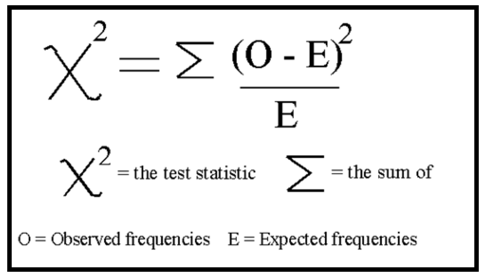

In [28]:
# Calculate chi2
observed = minnesota_table
national_ratios = national_table/len(national) # get population ratios
expected = national_ratios * len(minnesota) # get expected counts
chi_square_stat = (((observed-expected)**2)/expected).sum()

print("Chi-squared:", chi_square_stat[0])

Chi-squared: 32.466307277628026


### Effect of LandContour on SalePrice

In [29]:
# import scipy
import scipy.stats as sp

In [30]:
# function to compute chi2
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)

In [31]:
price = pd.qcut(df['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(df.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


#### The frequency distribution reflects this

In [32]:
import statsmodels.api as sm
import pylab

In [33]:
def create_qqplot(data,title):
    sm.qqplot(data, line = '45')
    plt.title(title)
    pylab.show()

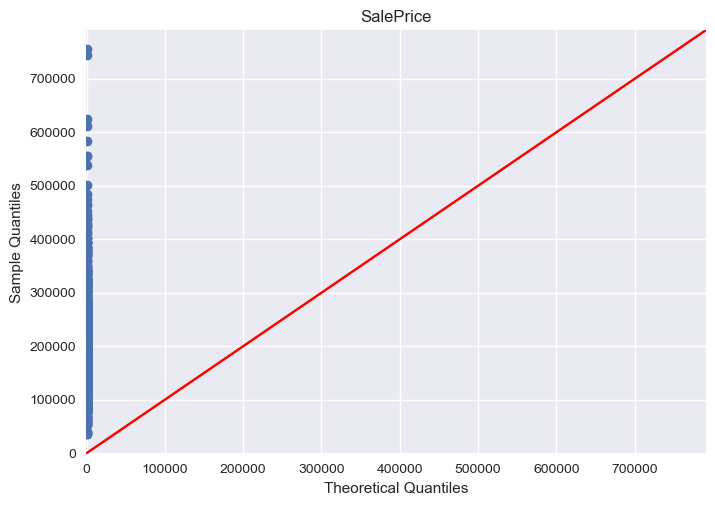

In [34]:
create_qqplot(df['SalePrice'], 'SalePrice')

In [35]:
# Use the normality test
from scipy.stats import shapiro, normaltest, anderson

In [36]:
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])},
             'Shapiro' : shapiro(data)[1],
             'k^2': normaltest(data)[1]}
    result['Anderson']['Stat'] = anderson(data)[0]
    return result

In [37]:
try_normal(df['SalePrice'])

{'Anderson': {15.0: 0.574,
  10.0: 0.654,
  5.0: 0.785,
  2.5: 0.916,
  1.0: 1.089,
  'Stat': 41.69199630641583},
 'Shapiro': 3.2072044604461286e-33,
 'k^2': 2.283848353787728e-133}

## Reference
1. https://datatab.net/tutorial/descriptive-inferential-statistics
2. https://www.scribbr.com/statistics/inferential-statistics/
3. https://www.questionpro.com/blog/inferential-statistics/
4. https://www.geeksforgeeks.org/style-plots-using-matplotlib/